<a href="https://colab.research.google.com/github/bg27dumplings/CNN-Assignment-2025/blob/main/CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

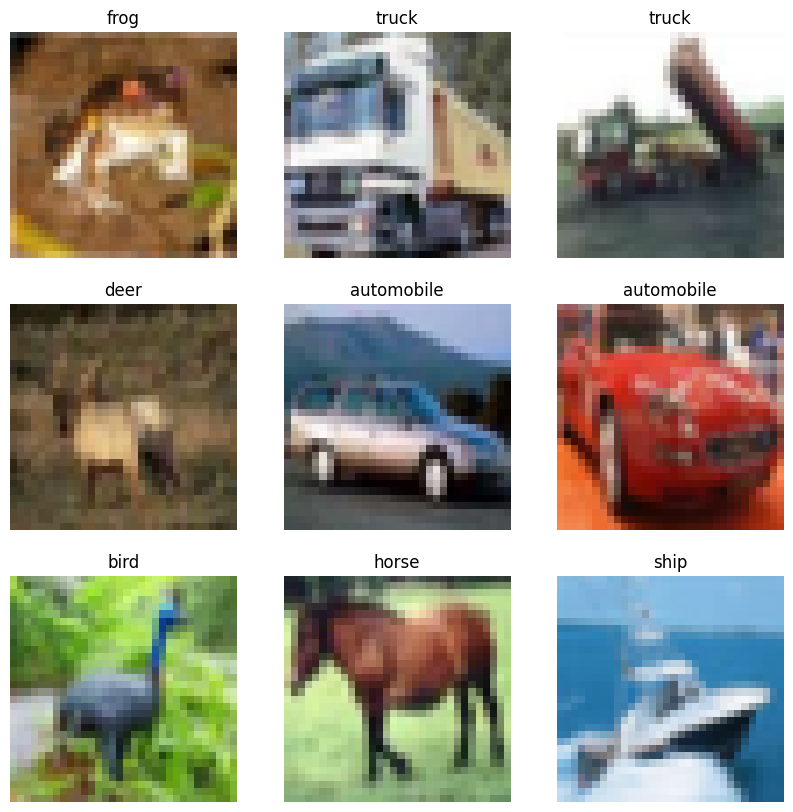

In [6]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [44]:
# Step 4: Build the CNN Model
model = models.Sequential([
    # Convolutional Layer 1: 32 filters, 3x3 kernel, ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    # Convolutional Layer 2: 64 filters, 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    # Convolutional Layer 3: 64 filters, 3x3 kernel
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Flatten the output for dense layers
    layers.Flatten(),
    # Dense Layer: 64 units
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    # Output Layer: 10 units (one per class) with softmax
    layers.Dense(10, activation='softmax')
])
# Display model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,490 (2.61 MB)

 Trainable params: 684,490 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
# Step 6: Train the Model

EPOCHS = 25
BATCH_SIZE = 128
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
)
datagen.fit(train_images)
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=BATCH_SIZE),
    epochs=EPOCHS,
    validation_data=(test_images, test_labels),
    steps_per_epoch=len(train_images)

)


Epoch 1/25
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 119s 2ms/step - accuracy: 0.3284 - loss: 1.8263 - val_accuracy: 0.4682 - val_loss: 1.4804
Epoch 2/25
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 141s 2ms/step - accuracy: 0.4510 - loss: 1.5095 - val_accuracy: 0.5177 - val_loss: 1.3508
Epoch 3/25
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 121s 2ms/step - accuracy: 0.5049 - loss: 1.3829 - val_accuracy: 0.5750 - val_loss: 1.1966
Epoch 4/25
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 118s 2ms/step - accuracy: 0.5373 - loss: 1.2981 - val_accuracy: 0.6302 - val_loss: 1.0408
Epoch 5/25
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 143s 2ms/step - accuracy: 0.5617 - loss: 1.2410 - val_accuracy: 0.6308 - val_loss: 1.0363
Epoch 6/25
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 119s 2ms/step - accuracy: 0.5826 - loss: 1.1882 - val_accuracy: 0.6664 - val_loss: 0.9394
Epoch 7/25
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 118s 2ms/step - accuracy: 0.5982 - loss: 1.1512 - val_accuracy: 0.6753 - val_loss: 0.9138
Epoch 8/25
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 119s 2ms/step - ac

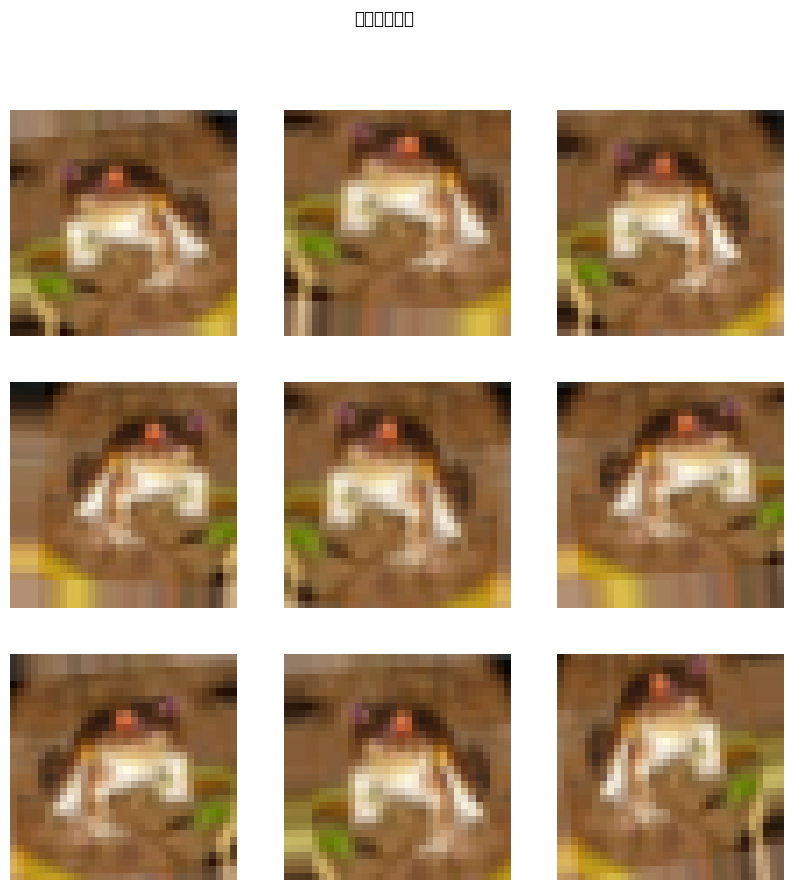

In [47]:
# 視覺化一些增強後的圖像
plt.figure(figsize=(10, 10))
# 從訓練集中取一張圖像
img_to_augment = train_images[0]
# 將其重塑為 (1, 32, 32, 3)，因為生成器期望一批圖像
img_to_augment_batch = img_to_augment.reshape((1,) + img_to_augment.shape)

i = 0
for batch in datagen.flow(img_to_augment_batch, batch_size=1): # 一次生成一張增強圖像
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch[0]) # 這些增強通常不會使像素值超出 [0,1]
    plt.axis('off')
    i += 1
    if i % 9 == 0: # 顯示 9 個增強版本
        break
plt.suptitle("增強圖像範例")
plt.show()

In [48]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 5s - 16ms/step - accuracy: 0.7530 - loss: 0.7196

Test accuracy: 0.7530


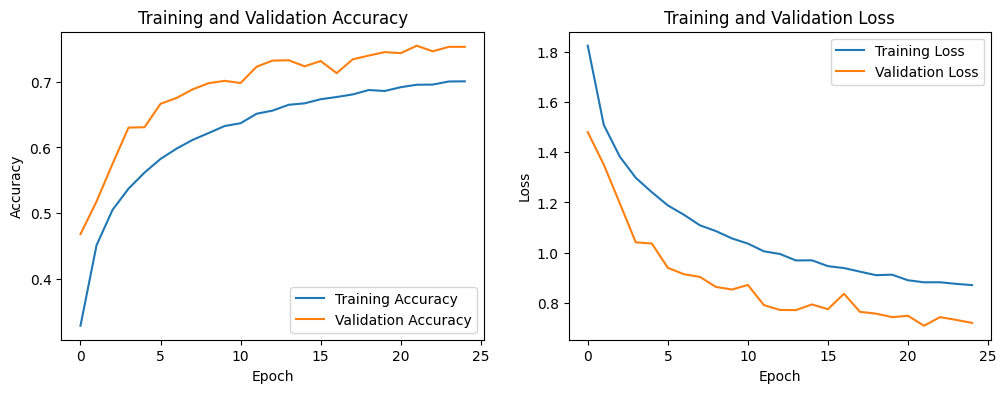

In [49]:

# Step 8: Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [50]:
# Step 9: Make Predictions
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Image 1: Predicted: cat, True: cat
Image 2: Predicted: ship, True: ship
Image 3: Predicted: ship, True: ship
Image 4: Predicted: airplane, True: airplane
Image 5: Predicted: frog, True: frog


In [51]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.7530
Test Loss: 0.7196
Final Training Accuracy: 0.7006
Final Validation Accuracy: 0.7530
Final Training Loss: 0.8703
Final Validation Loss: 0.7196
Training Epochs: 25
Model Parameters: 684490


# Task 5

## CNN Model Structure 調整

- padding參數改成same保持原維度
- 第3層濾波器數量增加至 128
- 新增Dropout並將參數設為0.25，最後設為0.5

## Train Model 調整

### 新增 ImageDataGenerator 參數如下

- rotation_range = 15  
- width_shift_range = 0.1
- height_shift_range = 0.1
- horizontal_flip = True
- zoom_range = 0.1

### model fit 部分

- Epochs 改成 25
- Batch 大小改成 128

